## Marketing Campaign

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

# Read the Data from an Excel file
marc = pd.read_excel('/Users/nikhilsharma/Desktop/Data/Datasets/Marketing Campaign/marketing_campaign.xlsx')
marc.head()

# Perform data cleaning and preprocessing

# Convert Dt_Customer to Datetime Type
marc['Dt_Customer'] = pd.to_datetime(marc['Dt_Customer'], format='%Y-%m-%d')
print(marc['Dt_Customer'].head())

# Create Date, Month & Year Columns from Invoice Date
marc['year_cust_enroll'] = marc['Dt_Customer'].dt.year
marc['month_cust_enroll'] = marc['Dt_Customer'].dt.month
marc['date_cust_enroll'] = marc['Dt_Customer'].dt.day

# Create Revenue Column
marc['Revenue'] = marc[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
print(marc.head())

# Perform exploratory data analysis (EDA)

# Check Data Shape
data_shape = marc.shape

# Check Data Columns
data_columns = marc.columns.tolist()

# Check Distribution of Numerical Variables
data_description = marc.describe()

# Check Data Type
data_info = marc.info()
data_dtypes = marc.dtypes

# Check for Missing Values
missing_values_any = marc.isna().any()
missing_values_sum = marc.isna().sum()

# Find the Missing Rows in Income
missing_income_rows = marc[marc['Income'].isna()]

# Fill the missing values in Income by Education
average_income_by_education = marc.groupby('Education')['Income'].transform('mean')
marc['Income'] = marc['Income'].fillna(average_income_by_education)

# Update the report with the imputed values
report = """
Data Analysis, Exploration, and Reporting:

- Data Shape: {}
- Data Columns: {}
- Distribution of Numerical Variables:
{}
- Data Type Information:
{}
- Missing Values (Any):
{}
- Missing Values (Sum):
{}
- Missing Rows in Income:
{}

Updated Values:
- Imputed missing values in Income column with average values based on Education.
- Updated dataset:
{}
""".format(
    data_shape,
    data_columns,
    data_description,
    data_info,
    missing_values_any,
    missing_values_sum,
    missing_income_rows,
    marc.head()
)

print(report)

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  2012-09-04       58       635  ...             0             0         0   
1  2014-03-08       38        11  ...             0             0         0   
2  2013-08-21       26       426  ...             0             0         0   
3  2014-02-10       26        11  ...             0             0         0   
4  2014-01-19       

In [65]:
# Perform data analysis and modeling


# Function to print the result with a title
def print_result(title, result):
    print("\n" + title)
    print(result)

# Function to get the top n rows by a column and select specific columns
def get_top_n_rows(data, n, column, columns_to_select):
    top_n = data.nlargest(n, column)[columns_to_select].sort_values(ascending=False)
    return top_n

# Function to group data by a column, get the maximum value of another column, and select specific columns
def group_by_and_get_max(data, group_column, max_column, columns_to_select):
    grouped = data.groupby(group_column)[max_column].max().reset_index()
    grouped = grouped[columns_to_select].sort_values(by=max_column, ascending=False)
    return grouped

# Function to print the result with a title
def print_result(title, result):
    print("\n" + title)
    print(result)




# Top 10 Highest Month & Year Customer Enrolled by Revenue
top_month_year_revenue = marc.nlargest(10, 'Revenue')[['month_cust_enroll', 'year_cust_enroll', 'Revenue']]
print_result("Top 10 Highest Month & Year Customer Enrolled by Revenue:", top_month_year_revenue)

# Top 10 Years of Birth by Revenue
top_year_birth_revenue = marc.nlargest(10, 'Revenue')[['Year_Birth', 'Revenue']]
print_result("Top 10 Years of Birth by Revenue:", top_year_birth_revenue)

# Accepted Campaigns Ranked in Descending Order
accepted_cmp_ranking = marc[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum().sort_values(ascending=False)
print_result("Accepted Campaigns Ranked in Descending Order:", accepted_cmp_ranking)

# Top 10 Income by Revenue
top_income_revenue = marc.nlargest(10, 'Revenue')[['Income', 'Revenue']]
print_result("Top 10 Income by Revenue:", top_income_revenue)

# Top 10 Kids at Home by Revenue
top_10_kidhome_revenue = marc.nlargest(10, 'Revenue')[['Kidhome', 'Revenue']]
print_result("Top 10 Kids at Home by Revenue:", top_10_kidhome_revenue)

# Top 10 Teens at Home by Revenue
top_10_teenhome_revenue = marc.nlargest(10, 'Revenue')[['Teenhome', 'Revenue']]
print_result("Top 10 Teens at Home by Revenue:", top_10_teenhome_revenue)

# Top 10 Recency (No. of days since last purchase) by Revenue
top_10_recency_revenue = marc.nlargest(10, 'Revenue')[['Recency', 'Revenue']]
print_result("Top 10 Recency (No. of days since last purchase) by Revenue:", top_10_recency_revenue)

# Top 10 Revenue by Recency
top_10_revenue_by_recency = marc.nlargest(10, 'Recency')[['Revenue', 'Recency']]
print_result("Top 10 Revenue by Recency:", top_10_revenue_by_recency)

# Top MntFruits by Income
top_mntfruits_income = marc.nlargest(10, 'Income')[['MntFruits', 'Income']]
print_result("Top MntFruits by Income:", top_mntfruits_income)

# Top MntFruits by Education
top_mntfruits_education = marc.groupby('Education')['MntFruits'].max().reset_index()
print_result("Top MntFruits by Education:", top_mntfruits_education)

# Top MntFruits by Kidhome
top_mntfruits_kidhome = marc.groupby('Kidhome')['MntFruits'].max().reset_index()
print_result("Top MntFruits by Kidhome:", top_mntfruits_kidhome)

# Top MntFruits by Teenhome
top_mntfruits_teenhome = marc.groupby('Teenhome')['MntFruits'].max().reset_index()
print_result("Top MntFruits by Teenhome:", top_mntfruits_teenhome)

# Top MntFruits by Revenue
top_mntfruits_revenue = marc.nlargest(10, 'Revenue')[['MntFruits', 'Revenue']]
print_result("Top MntFruits by Revenue:", top_mntfruits_revenue)

# Top MntWines by Income
top_mntwines_income = marc.nlargest(10, 'Income')[['MntWines', 'Income']]
print_result("Top MntWines by Income:", top_mntwines_income)

# Top MntWines by Education
top_mntwines_education = marc.groupby('Education')['MntWines'].max().reset_index()
print_result("Top MntWines by Education:", top_mntwines_education)

# Top MntWines by Kidhome
top_mntwines_kidhome = marc.groupby('Kidhome')['MntWines'].max().reset_index()
print_result("Top MntWines by Kidhome:", top_mntwines_kidhome)

# Top MntWines by Teenhome
top_mntwines_teenhome = marc.groupby('Teenhome')['MntWines'].max().reset_index()
print_result("Top MntWines by Teenhome:", top_mntwines_teenhome)

# Top MntWines by Revenue
top_mntwines_revenue = marc.nlargest(10, 'Revenue')[['MntWines', 'Revenue']]
print_result("Top MntWines by Revenue:", top_mntwines_revenue)

# Top MntMeatProducts by Income
top_mntmeat_income = marc.nlargest(10, 'Income')[['MntMeatProducts', 'Income']]
print_result("Top MntMeatProducts by Income:", top_mntmeat_income)

# Top MntMeatProducts by Education
top_mntmeat_education = marc.groupby('Education')['MntMeatProducts'].max().reset_index()
print_result("Top MntMeatProducts by Education:", top_mntmeat_education)

# Top MntMeatProducts by Kidhome
top_mntmeat_kidhome = marc.groupby('Kidhome')['MntMeatProducts'].max().reset_index()
print_result("Top MntMeatProducts by Kidhome:", top_mntmeat_kidhome)

# Top MntMeatProducts by Teenhome
top_mntmeat_teenhome = marc.groupby('Teenhome')['MntMeatProducts'].max().reset_index()
print_result("Top MntMeatProducts by Teenhome:", top_mntmeat_teenhome)

# Top MntMeatProducts by Revenue
top_mntmeat_revenue = marc.nlargest(10, 'Revenue')[['MntMeatProducts', 'Revenue']]
print_result("Top MntMeatProducts by Revenue:", top_mntmeat_revenue)

# Top MntFishProducts by Income
top_mntfish_income = marc.nlargest(10, 'Income')[['MntFishProducts', 'Income']].sort_values(by='Income', ascending=False)
print_result("Top MntFishProducts by Income:", top_mntfish_income)

# Top MntFishProducts by Education
top_mntfish_education = marc.groupby('Education')['MntFishProducts'].max().reset_index().sort_values(by='MntFishProducts', ascending=False)
print_result("Top MntFishProducts by Education:", top_mntfish_education)

# Top MntFishProducts by Kidhome
top_mntfish_kidhome = marc.groupby('Kidhome')['MntFishProducts'].max().reset_index().sort_values(by='MntFishProducts', ascending=False)
print_result("Top MntFishProducts by Kidhome:", top_mntfish_kidhome)

# Top MntFishProducts by Teenhome
top_mntfish_teenhome = marc.groupby('Teenhome')['MntFishProducts'].max().reset_index().sort_values(by='MntFishProducts', ascending=False)
print_result("Top MntFishProducts by Teenhome:", top_mntfish_teenhome)

# Top MntFishProducts by Revenue
top_mntfish_revenue = marc.nlargest(10, 'Revenue')[['MntFishProducts', 'Revenue']].sort_values(by='Revenue', ascending=False)
print_result("Top MntFishProducts by Revenue:", top_mntfish_revenue)

# Top 10 NumDealsPurchases by Income
top_numdeals_income = marc.nlargest(10, 'Income')[['NumDealsPurchases', 'Income']].sort_values(by='Income', ascending=False)
print_result("Top 10 NumDealsPurchases by Income:", top_numdeals_income)

# Top 10 NumDealsPurchases by Education
top_numdeals_education = marc.groupby('Education')['NumDealsPurchases'].nlargest(10).reset_index().sort_values(by='NumDealsPurchases', ascending=False)
print_result("Top 10 NumDealsPurchases by Education:", top_numdeals_education)

# Top 10 NumDealsPurchases by Kidhome
top_numdeals_kidhome = marc.groupby('Kidhome')['NumDealsPurchases'].nlargest(10).reset_index().sort_values(by='NumDealsPurchases', ascending=False)
print_result("Top 10 NumDealsPurchases by Kidhome:", top_numdeals_kidhome)

# Top 10 NumDealsPurchases by Teenhome
top_numdeals_teenhome = marc.groupby('Teenhome')['NumDealsPurchases'].nlargest(10).reset_index().sort_values(by='NumDealsPurchases', ascending=False)
print_result("Top 10 NumDealsPurchases by Teenhome:", top_numdeals_teenhome)

# Top 10 NumDealsPurchases by Revenue
top_numdeals_revenue = marc.nlargest(10, 'Revenue')[['NumDealsPurchases', 'Revenue']].sort_values(by='Revenue', ascending=False)
print_result("Top 10 NumDealsPurchases by Revenue:", top_numdeals_revenue)

# Top 10 NumWebPurchases by Income
top_numweb_income = marc.nlargest(10, 'Income')[['NumWebPurchases', 'Income']].sort_values(by='Income', ascending=False)
print_result("Top 10 NumWebPurchases by Income:", top_numweb_income)

# Top 10 NumWebPurchases by Education
top_numweb_education = marc.groupby('Education')['NumWebPurchases'].nlargest(10).reset_index().sort_values(by='NumWebPurchases', ascending=False)
print_result("Top 10 NumWebPurchases by Education:", top_numweb_education)

# Top 10 NumWebPurchases by Kidhome
top_numweb_kidhome = marc.groupby('Kidhome')['NumWebPurchases'].nlargest(10).reset_index().sort_values(by='NumWebPurchases', ascending=False)
print_result("Top 10 NumWebPurchases by Kidhome:", top_numweb_kidhome)

# Top 10 NumWebPurchases by Teenhome
top_numweb_teenhome = marc.groupby('Teenhome')['NumWebPurchases'].nlargest(10).reset_index().sort_values(by='NumWebPurchases', ascending=False)
print_result("Top 10 NumWebPurchases by Teenhome:", top_numweb_teenhome)

# Top 10 NumWebPurchases by Revenue
top_numweb_revenue = marc.nlargest(10, 'Revenue')[['NumWebPurchases', 'Revenue']].sort_values(by='Revenue', ascending=False)
print_result("Top 10 NumWebPurchases by Revenue:", top_numweb_revenue)

# Top 10 MntFruits by revenue
top_mntfruits_revenue = marc.nlargest(10, 'Revenue')[['MntFruits', 'Revenue']].sort_values(by='Revenue', ascending=False)
print_result("Top 10 MntFruits by revenue:", top_mntfruits_revenue)

# Top 10 MntWines by revenue
top_mntwines_revenue = marc.nlargest(10, 'Revenue')[['MntWines', 'Revenue']].sort_values(by='Revenue', ascending=False)
print_result("Top 10 MntWines by revenue:", top_mntwines_revenue)

# Top 10 MntMeatProducts by revenue
top_mntmeat_revenue = marc.nlargest(10, 'Revenue')[['MntMeatProducts', 'Revenue']].sort_values(by='Revenue', ascending=False)
print_result("Top 10 MntMeatProducts by revenue:", top_mntmeat_revenue)

# Top 10 MntFishProducts by revenue
top_mntfish_revenue = marc.nlargest(10, 'Revenue')[['MntFishProducts', 'Revenue']].sort_values(by='Revenue', ascending=False)
print_result("Top 10 MntFishProducts by revenue:", top_mntfish_revenue)

# Top 10 MntSweetProducts by revenue
top_mntsweet_revenue = marc.nlargest(10, 'Revenue')[['MntSweetProducts', 'Revenue']].sort_values(by='Revenue', ascending=False)
print_result("Top 10 MntSweetProducts by revenue:", top_mntsweet_revenue)

# Top 10 MntGoldProds by revenue
top_mntgold_revenue = marc.nlargest(10, 'Revenue')[['MntGoldProds', 'Revenue']].sort_values(by='Revenue', ascending=False)
print_result("Top 10 MntGoldProds by revenue:", top_mntgold_revenue)

# Top 10 NumDealsPurchases by top MntFruits
top_numdeals_mntfruits = marc.nlargest(10, 'MntFruits')[['NumDealsPurchases', 'MntFruits']].sort_values(by='MntFruits', ascending=False)
print_result("Top 10 NumDealsPurchases by top MntFruits:", top_numdeals_mntfruits)

# Top 10 NumWebPurchases by top MntFruits
top_numweb_mntfruits = marc.nlargest(10, 'MntFruits')[['NumWebPurchases', 'MntFruits']].sort_values(by='MntFruits', ascending=False)
print_result("Top 10 NumWebPurchases by top MntFruits:", top_numweb_mntfruits)

# Top 10 NumCatalogPurchases by top MntFruits
top_numcatalog_mntfruits = marc.nlargest(10, 'MntFruits')[['NumCatalogPurchases', 'MntFruits']].sort_values(by='MntFruits', ascending=False)
print_result("Top 10 NumCatalogPurchases by top MntFruits:", top_numcatalog_mntfruits)

# Top 10 NumStorePurchases by top MntFruits
top_numstore_mntfruits = marc.nlargest(10, 'MntFruits')[['NumStorePurchases', 'MntFruits']].sort_values(by='MntFruits', ascending=False)
print_result("Top 10 NumStorePurchases by top MntFruits:", top_numstore_mntfruits)

# Top 10 NumDealsPurchases by top MntWines
top_numdeals_mntwines = marc.nlargest(10, 'MntWines')[['NumDealsPurchases', 'MntWines']].sort_values(by='MntWines', ascending=False)
print_result("Top 10 NumDealsPurchases by top MntWines:", top_numdeals_mntwines)

# Top 10 NumWebPurchases by top MntWines
top_numweb_mntwines = marc.nlargest(10, 'MntWines')[['NumWebPurchases', 'MntWines']].sort_values(by='MntWines', ascending=False)
print_result("Top 10 NumWebPurchases by top MntWines:", top_numweb_mntwines)

# Top 10 NumCatalogPurchases by top MntWines
top_numcatalog_mntwines = marc.nlargest(10, 'MntWines')[['NumCatalogPurchases', 'MntWines']].sort_values(by='MntWines', ascending=False)
print_result("Top 10 NumCatalogPurchases by top MntWines:", top_numcatalog_mntwines)

# Top 10 NumStorePurchases by top MntWines
top_numstore_mntwines = marc.nlargest(10, 'MntWines')[['NumStorePurchases', 'MntWines']].sort_values(by='MntWines', ascending=False)
print_result("Top 10 NumStorePurchases by top MntWines:", top_numstore_mntwines)

# Top 10 NumDealsPurchases by top MntMeatProducts
top_numdeals_mntmeat = marc.nlargest(10, 'MntMeatProducts')[['NumDealsPurchases', 'MntMeatProducts']].sort_values(by='MntMeatProducts', ascending=False)
print_result("Top 10 NumDealsPurchases by top MntMeatProducts:", top_numdeals_mntmeat)

# Top 10 NumWebPurchases by top MntMeatProducts
top_numweb_mntmeat = marc.nlargest(10, 'MntMeatProducts')[['NumWebPurchases', 'MntMeatProducts']].sort_values(by='MntMeatProducts', ascending=False)
print_result("Top 10 NumWebPurchases by top MntMeatProducts:", top_numweb_mntmeat)

# Top 10 NumCatalogPurchases by top MntMeatProducts
top_numcatalog_mntmeat = marc.nlargest(10, 'MntMeatProducts')[['NumCatalogPurchases', 'MntMeatProducts']].sort_values(by='MntMeatProducts', ascending=False)
print_result("Top 10 NumCatalogPurchases by top MntMeatProducts:", top_numcatalog_mntmeat)

# Top 10 NumStorePurchases by top MntMeatProducts
top_numstore_mntmeat = marc.nlargest(10, 'MntMeatProducts')[['NumStorePurchases', 'MntMeatProducts']].sort_values(by='MntMeatProducts', ascending=False)
print_result("Top 10 NumStorePurchases by top MntMeatProducts:", top_numstore_mntmeat)

# Top 10 NumDealsPurchases by top MntFishProducts
top_numdeals_mntfish = marc.nlargest(10, 'MntFishProducts')[['NumDealsPurchases', 'MntFishProducts']].sort_values(by='MntFishProducts', ascending=False)
print_result("Top 10 NumDealsPurchases by top MntFishProducts:", top_numdeals_mntfish)

# Top 10 NumWebPurchases by top MntFishProducts
top_numweb_mntfish = marc.nlargest(10, 'MntFishProducts')[['NumWebPurchases', 'MntFishProducts']].sort_values(by='MntFishProducts', ascending=False)
print_result("Top 10 NumWebPurchases by top MntFishProducts:", top_numweb_mntfish)

# Top 10 NumCatalogPurchases by top MntFishProducts
top_numcatalog_mntfish = marc.nlargest(10, 'MntFishProducts')[['NumCatalogPurchases', 'MntFishProducts']].sort_values(by='MntFishProducts', ascending=False)
print_result("Top 10 NumCatalogPurchases by top MntFishProducts:", top_numcatalog_mntfish)
    
# Top 10 NumStorePurchases by top MntFishProducts
top_numstore_mntfish = marc.nlargest(10, 'MntFishProducts')[['NumStorePurchases', 'MntFishProducts']].sort_values(by='MntFishProducts', ascending=False)
print_result("Top 10 NumStorePurchases by top MntFishProducts:", top_numstore_mntfish)

# Top 10 NumDealsPurchases by top MntSweetProducts
top_numdeals_mntsweet = marc.nlargest(10, 'MntSweetProducts')[['NumDealsPurchases', 'MntSweetProducts']].sort_values(by='MntSweetProducts', ascending=False)
print_result("Top 10 NumDealsPurchases by top MntSweetProducts:", top_numdeals_mntsweet)

# Top 10 NumWebPurchases by top MntSweetProducts
top_numweb_mntsweet = marc.nlargest(10, 'MntSweetProducts')[['NumWebPurchases', 'MntSweetProducts']].sort_values(by='MntSweetProducts', ascending=False)
print_result("Top 10 NumWebPurchases by top MntSweetProducts:", top_numweb_mntsweet)

# Top 10 NumCatalogPurchases by top MntSweetProducts
top_numcatalog_mntsweet = marc.nlargest(10, 'MntSweetProducts')[['NumCatalogPurchases', 'MntSweetProducts']].sort_values(by='MntSweetProducts', ascending=False)
print_result("Top 10 NumCatalogPurchases by top MntSweetProducts:", top_numcatalog_mntsweet)

# Top 10 NumStorePurchases by top MntSweetProducts
top_numstore_mntsweet = marc.nlargest(10, 'MntSweetProducts')[['NumStorePurchases', 'MntSweetProducts']].sort_values(by='MntSweetProducts', ascending=False)
print_result("Top 10 NumStorePurchases by top MntSweetProducts:", top_numstore_mntsweet)

# Top 10 NumDealsPurchases by top MntGoldProds
top_numdeals_mntgold = marc.nlargest(10, 'MntGoldProds')[['NumDealsPurchases', 'MntGoldProds']].sort_values(by='MntGoldProds', ascending=False)
print_result("Top 10 NumDealsPurchases by top MntGoldProds:", top_numdeals_mntgold)

# Top 10 NumWebPurchases by top MntGoldProds
top_numweb_mntgold = marc.nlargest(10, 'MntGoldProds')[['NumWebPurchases', 'MntGoldProds']].sort_values(by='MntGoldProds', ascending=False)
print_result("Top 10 NumWebPurchases by top MntGoldProds:", top_numweb_mntgold)

# Top 10 NumCatalogPurchases by top MntGoldProds
top_numcatalog_mntgold = marc.nlargest(10, 'MntGoldProds')[['NumCatalogPurchases', 'MntGoldProds']].sort_values(by='MntGoldProds', ascending=False)
print_result("Top 10 NumCatalogPurchases by top MntGoldProds:", top_numcatalog_mntgold)

# Top 10 NumStorePurchases by top MntGoldProds
top_numstore_mntgold = marc.nlargest(10, 'MntGoldProds')[['NumStorePurchases', 'MntGoldProds']].sort_values(by='MntGoldProds', ascending=False)
print_result("Top 10 NumStorePurchases by top MntGoldProds:", top_numstore_mntgold)

# Top 10 IDs by revenue
top_10_ids_revenue = get_top_n_rows(marc, 10, 'Revenue', 'ID').sort_values(ascending=False)
print_result("Top 10 IDs by revenue:", top_10_ids_revenue)

# Top 10 responses by ID
top_10_ids_responses = marc.groupby('ID')['Response'].sum().nlargest(10).sort_values(ascending=False)
print_result("Top 10 responses by ID:", top_10_ids_responses)

# Top 10 complaints by ID and revenue
top_10_ids_complaints_revenue = marc.groupby('ID')['Complain'].sum().nlargest(10).sort_values(ascending=False)
print_result("Top 10 complaints by ID and revenue:", top_10_ids_complaints_revenue)

# Define the columns and campaigns
columns = ['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Loop over the columns
for column in columns:
    # Get the top values for the current column
    top_values = marc.nlargest(10, column)

    print(f"\nCustomers Accepted for {column}:")
    # Loop over the campaigns
    for campaign in campaigns:
        # Calculate the number of customers who accepted the campaign among the top values
        accepted_customers = top_values[top_values[campaign] == 1].shape[0]

        print(f"Campaign {campaign}: {accepted_customers} customers accepted")

    print()

# Calculate sum of complaints, cost to contact, and revenue grouped by customer ID
grouped_data = marc.groupby('ID').agg({'Complain': 'sum', 'Z_CostContact': 'sum', 'Revenue': 'sum'})

grouped_data = grouped_data.sort_values(by=['Complain','Revenue'], ascending=False)
# Rename the columns for clarity
grouped_data.rename(columns={'Complain': 'Sum_Complaints', 'Z_CostContact': 'Sum_CostToContact', 'Revenue': 'Sum_Revenue'}, inplace=True)

# Display the grouped data
print("\nGrouped data:\n")
print(grouped_data.head(10))

# Calculate quartiles based on revenue for cust_id
quartiles = pd.qcut(marc['Revenue'], q=4, labels=False)
marc['Quartiles'] = quartiles

# Calculate the average recency by quartiles of cust_id based on revenue
avg_recency_by_quartiles = marc.groupby('Quartiles')['Recency'].mean()
print("\nAverage Recency by Quartiles of Cust_ID based on Revenue:\n")
print(avg_recency_by_quartiles)

# Calculate the average Z_Revenue and Z_CostContact
avg_z_revenue = marc['Z_Revenue'].mean()
avg_z_cost = marc['Z_CostContact'].mean()

# Calculate the sum of responses
sum_responses = marc['Response'].sum()

# Print the results
print("\nAverage Z_Revenue: ", avg_z_revenue)
print("\nAverage Z_CostContact: ", avg_z_cost)
print("\nSum of Responses: ", sum_responses)


Top 10 Highest Month & Year Customer Enrolled by Revenue:
      month_cust_enroll  year_cust_enroll  Revenue
1179                  2              2014     2525
1572                  2              2014     2525
1492                  7              2013     2524
987                  10              2013     2486
1052                  2              2013     2440
1601                  9              2012     2352
1458                  2              2014     2349
1288                  2              2013     2346
943                   3              2013     2302
1301                  3              2013     2302

Top 10 Years of Birth by Revenue:
      Year_Birth  Revenue
1179        1991     2525
1572        1991     2525
1492        1988     2524
987         1969     2486
1052        1949     2440
1601        1956     2352
1458        1970     2349
1288        1972     2346
943         1953     2302
1301        1953     2302

Accepted Campaigns Ranked in Descending Order:
AcceptedCmp

In [66]:
# Calculate mean MntMeatProducts for each category
mean_mntmeatproducts_income = marc.groupby('Income')['MntMeatProducts'].mean()
mean_mntmeatproducts_education = marc.groupby('Education')['MntMeatProducts'].mean()
mean_mntmeatproducts_kidhome = marc.groupby('Kidhome')['MntMeatProducts'].mean()
mean_mntmeatproducts_teenhome = marc.groupby('Teenhome')['MntMeatProducts'].mean()
mean_mntmeatproducts_revenue = marc.groupby('Revenue')['MntMeatProducts'].mean()

# Calculate top 10 categories with highest MntMeatProducts
top_mntmeatproducts_income = mean_mntmeatproducts_income.nlargest(10)
top_mntmeatproducts_education = mean_mntmeatproducts_education.nlargest(10)
top_mntmeatproducts_kidhome = mean_mntmeatproducts_kidhome.nlargest(10)
top_mntmeatproducts_teenhome = mean_mntmeatproducts_teenhome.nlargest(10)
top_mntmeatproducts_revenue = mean_mntmeatproducts_revenue.nlargest(10)

# Calculate mean MntFishProducts for each category
mean_mntfishproducts_income = marc.groupby('Income')['MntFishProducts'].mean()
mean_mntfishproducts_education = marc.groupby('Education')['MntFishProducts'].mean()
mean_mntfishproducts_kidhome = marc.groupby('Kidhome')['MntFishProducts'].mean()
mean_mntfishproducts_teenhome = marc.groupby('Teenhome')['MntFishProducts'].mean()
mean_mntfishproducts_revenue = marc.groupby('Revenue')['MntFishProducts'].mean()

# Calculate top 10 categories with highest MntFishProducts
top_mntfishproducts_income = mean_mntfishproducts_income.nlargest(10)
top_mntfishproducts_education = mean_mntfishproducts_education.nlargest(10)
top_mntfishproducts_kidhome = mean_mntfishproducts_kidhome.nlargest(10)
top_mntfishproducts_teenhome = mean_mntfishproducts_teenhome.nlargest(10)
top_mntfishproducts_revenue = mean_mntfishproducts_revenue.nlargest(10)

# Calculate mean MntSweetProducts for each category
mean_mntsweetproducts_income = marc.groupby('Income')['MntSweetProducts'].mean()
mean_mntsweetproducts_education = marc.groupby('Education')['MntSweetProducts'].mean()
mean_mntsweetproducts_kidhome = marc.groupby('Kidhome')['MntSweetProducts'].mean()
mean_mntsweetproducts_teenhome = marc.groupby('Teenhome')['MntSweetProducts'].mean()
mean_mntsweetproducts_revenue = marc.groupby('Revenue')['MntSweetProducts'].mean()

# Calculate top 10 categories with highest MntSweetProducts
top_mntsweetproducts_income = mean_mntsweetproducts_income.nlargest(10)
top_mntsweetproducts_education = mean_mntsweetproducts_education.nlargest(10)
top_mntsweetproducts_kidhome = mean_mntsweetproducts_kidhome.nlargest(10)
top_mntsweetproducts_teenhome = mean_mntsweetproducts_teenhome.nlargest(10)
top_mntsweetproducts_revenue = mean_mntsweetproducts_revenue.nlargest(10)

# Calculate mean MntGoldProds for each category
mean_mntgoldprods_income = marc.groupby('Income')['MntGoldProds'].mean()
mean_mntgoldprods_education = marc.groupby('Education')['MntGoldProds'].mean()
mean_mntgoldprods_kidhome = marc.groupby('Kidhome')['MntGoldProds'].mean()
mean_mntgoldprods_teenhome = marc.groupby('Teenhome')['MntGoldProds'].mean()
mean_mntgoldprods_revenue = marc.groupby('Revenue')['MntGoldProds'].mean()

# Calculate top 10 categories with highest MntGoldProds
top_mntgoldprods_income = mean_mntgoldprods_income.nlargest(10)
top_mntgoldprods_education = mean_mntgoldprods_education.nlargest(10)
top_mntgoldprods_kidhome = mean_mntgoldprods_kidhome.nlargest(10)
top_mntgoldprods_teenhome = mean_mntgoldprods_teenhome.nlargest(10)
top_mntgoldprods_revenue = mean_mntgoldprods_revenue.nlargest(10)

# Print the results
print("Top 10 Income levels with highest MntMeatProducts:")
print(top_mntmeatproducts_income)
print("\nTop 10 Education levels with highest MntMeatProducts:")
print(top_mntmeatproducts_education)
print("\nTop 10 Kidhome levels with highest MntMeatProducts:")
print(top_mntmeatproducts_kidhome)
print("\nTop 10 Teenhome levels with highest MntMeatProducts:")
print(top_mntmeatproducts_teenhome)
print("\nTop 10 Revenue levels with highest MntMeatProducts:")
print(top_mntmeatproducts_revenue)

print("\nTop 10 Income levels with highest MntFishProducts:")
print(top_mntfishproducts_income)
print("\nTop 10 Education levels with highest MntFishProducts:")
print(top_mntfishproducts_education)
print("\nTop 10 Kidhome levels with highest MntFishProducts:")
print(top_mntfishproducts_kidhome)
print("\nTop 10 Teenhome levels with highest MntFishProducts:")
print(top_mntfishproducts_teenhome)
print("\nTop 10 Revenue levels with highest MntFishProducts:")
print(top_mntfishproducts_revenue)

print("\nTop 10 Income levels with highest MntSweetProducts:")
print(top_mntsweetproducts_income)
print("\nTop 10 Education levels with highest MntSweetProducts:")
print(top_mntsweetproducts_education)
print("\nTop 10 Kidhome levels with highest MntSweetProducts:")
print(top_mntsweetproducts_kidhome)
print("\nTop 10 Teenhome levels with highest MntSweetProducts:")
print(top_mntsweetproducts_teenhome)
print("\nTop 10 Revenue levels with highest MntSweetProducts:")
print(top_mntsweetproducts_revenue)

print("\nTop 10 Income levels with highest MntGoldProds:")
print(top_mntgoldprods_income)
print("\nTop 10 Education levels with highest MntGoldProds:")
print(top_mntgoldprods_education)
print("\nTop 10 Kidhome levels with highest MntGoldProds:")
print(top_mntgoldprods_kidhome)
print("\nTop 10 Teenhome levels with highest MntGoldProds:")
print(top_mntgoldprods_teenhome)
print("\nTop 10 Revenue levels with highest MntGoldProds:")
print(top_mntgoldprods_revenue)

Top 10 Income levels with highest MntMeatProducts:
Income
2447.0      1725.0
157146.0    1725.0
160803.0    1622.0
157243.0    1582.0
80695.0      984.0
90369.0      981.0
89572.0      974.0
82332.0      968.0
91700.0      961.0
79607.0      951.0
Name: MntMeatProducts, dtype: float64

Top 10 Education levels with highest MntMeatProducts:
Education
Graduation    179.488909
PhD           168.602881
Master        163.378378
2n Cycle      141.256158
Basic          11.444444
Name: MntMeatProducts, dtype: float64

Top 10 Kidhome levels with highest MntMeatProducts:
Kidhome
0    253.996133
1     48.862069
2     33.833333
Name: MntMeatProducts, dtype: float64

Top 10 Teenhome levels with highest MntMeatProducts:
Teenhome
0    227.120035
2    124.769231
1    101.432039
Name: MntMeatProducts, dtype: float64

Top 10 Revenue levels with highest MntMeatProducts:
Revenue
1730    1725.0
1717    1622.0
1679    1607.0
1608    1582.0
1918     984.0
2059     974.0
2006     968.0
1968     961.0
1544     

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'year_cust_enroll', 'month_cust_enroll', 'date_cust_enroll', 'Revenue',
       'Quartiles'],
      dtype='object')


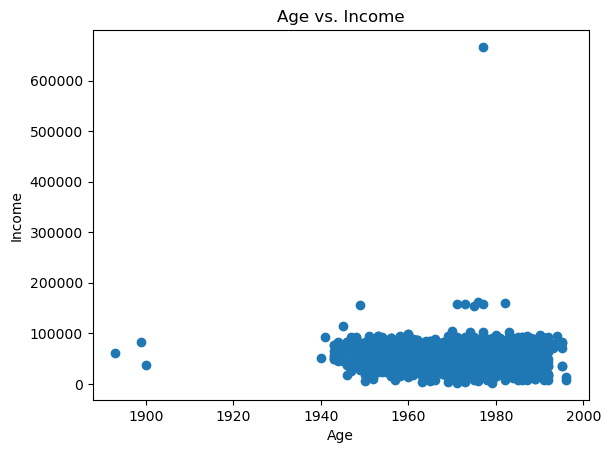

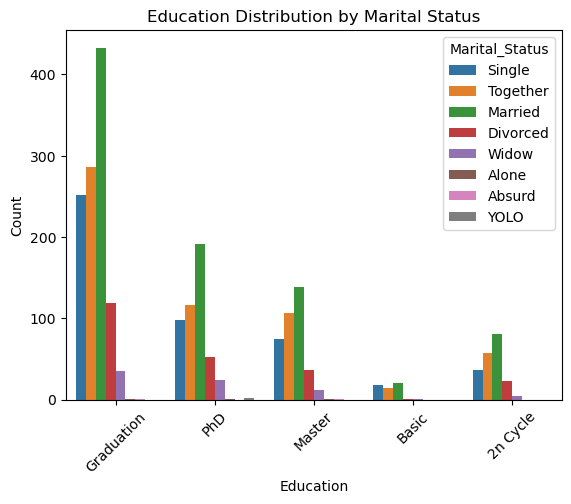

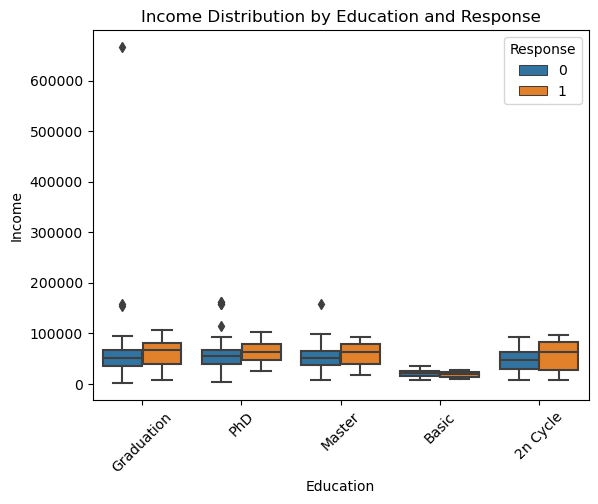

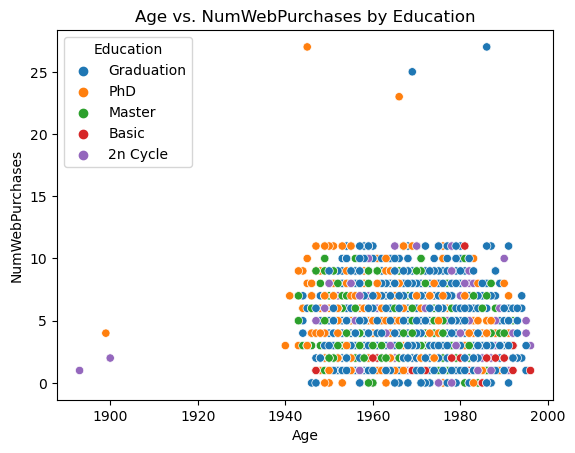

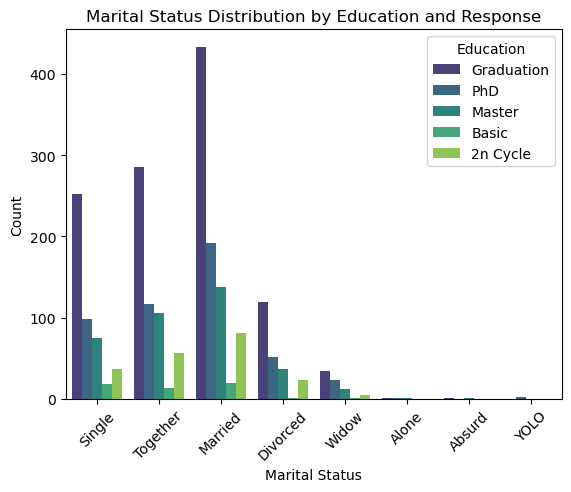

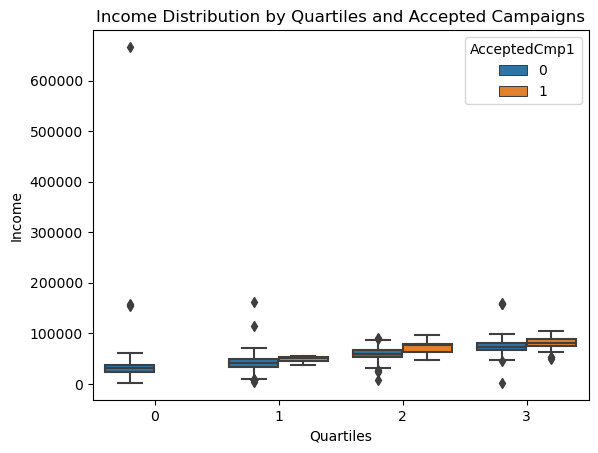

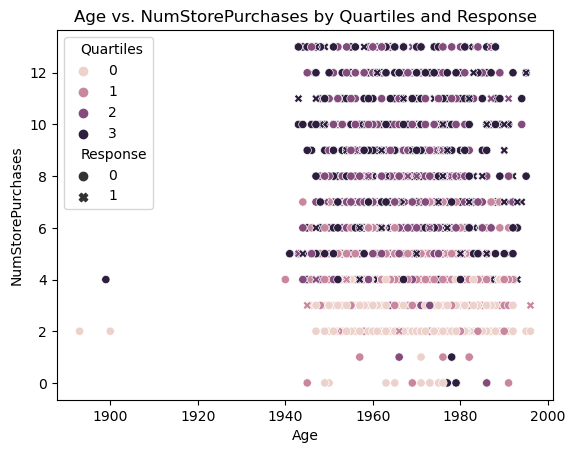

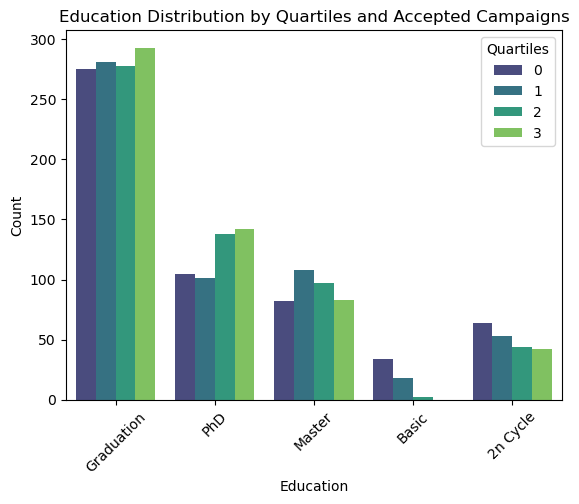

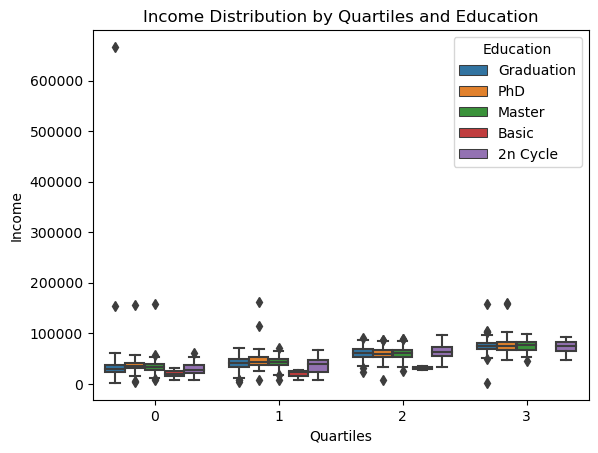

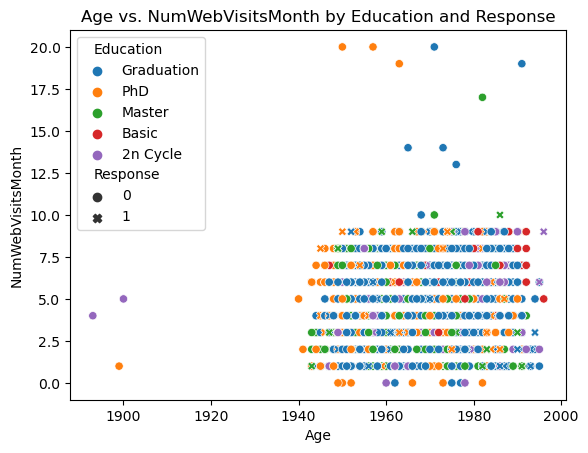

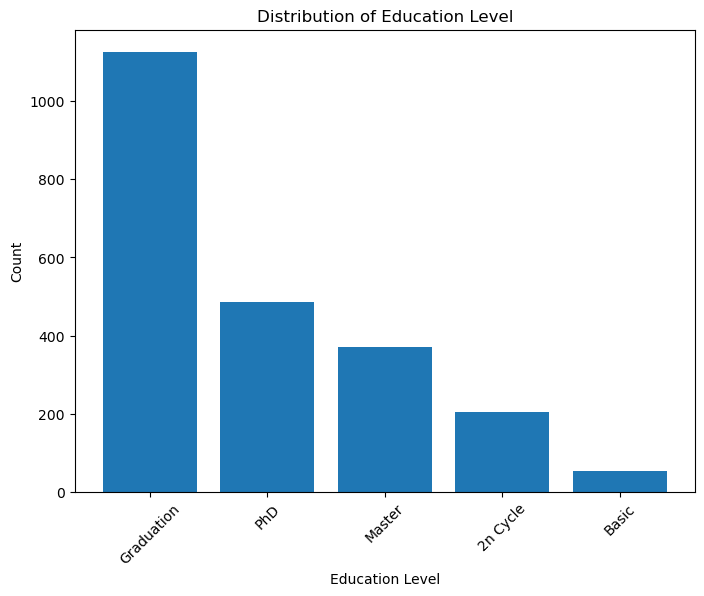

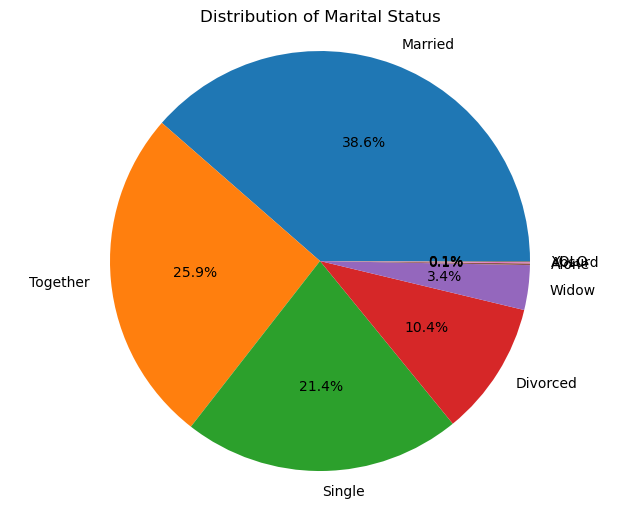

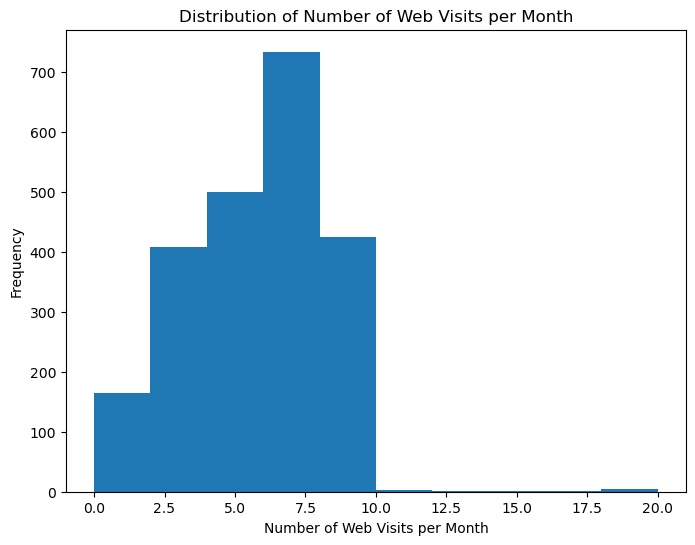

In [67]:
# Generate visualizations
print(marc.columns)

# Scatter Plot: Age vs. Income
plt.scatter(marc['Year_Birth'], marc['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income')
plt.show()

# Bar Chart: Education Distribution by Marital Status
sns.countplot(x='Education', hue='Marital_Status', data=marc)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution by Marital Status')
plt.xticks(rotation=45)
plt.show()

# Box Plot: Income Distribution by Education and Response
sns.boxplot(x='Education', y='Income', hue='Response', data=marc)
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Income Distribution by Education and Response')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot: Age vs. NumWebPurchases by Education
sns.scatterplot(x='Year_Birth', y='NumWebPurchases', hue='Education', data=marc)
plt.xlabel('Age')
plt.ylabel('NumWebPurchases')
plt.title('Age vs. NumWebPurchases by Education')
plt.show()

# Bar Chart: Marital Status Distribution by Education and Response
sns.countplot(x='Marital_Status', hue='Education', data=marc, palette='viridis')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution by Education and Response')
plt.xticks(rotation=45)
plt.show()

# Box Plot: Income Distribution by Quartiles and Accepted Campaigns
sns.boxplot(x='Quartiles', y='Income', hue='AcceptedCmp1', data=marc)
plt.xlabel('Quartiles')
plt.ylabel('Income')
plt.title('Income Distribution by Quartiles and Accepted Campaigns')
plt.show()

# Scatter Plot: Age vs. NumStorePurchases by Quartiles and Response
sns.scatterplot(x='Year_Birth', y='NumStorePurchases', hue='Quartiles', style='Response', data=marc)
plt.xlabel('Age')
plt.ylabel('NumStorePurchases')
plt.title('Age vs. NumStorePurchases by Quartiles and Response')
plt.show()

# Bar Chart: Education Distribution by Quartiles and Accepted Campaigns
sns.countplot(x='Education', hue='Quartiles', data=marc, palette='viridis')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution by Quartiles and Accepted Campaigns')
plt.xticks(rotation=45)
plt.show()

# Box Plot: Income Distribution by Quartiles and Education
sns.boxplot(x='Quartiles', y='Income', hue='Education', data=marc)
plt.xlabel('Quartiles')
plt.ylabel('Income')
plt.title('Income Distribution by Quartiles and Education')
plt.show()

# Scatter Plot: Age vs. NumWebVisitsMonth by Education and Response
sns.scatterplot(x='Year_Birth', y='NumWebVisitsMonth', hue='Education', style='Response', data=marc)
plt.xlabel('Age')
plt.ylabel('NumWebVisitsMonth')
plt.title('Age vs. NumWebVisitsMonth by Education and Response')
plt.show()

# Bar Chart: Education Level Distribution
# Count the occurrences of each education level
education_counts = marc['Education'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Level')
plt.xticks(rotation=45)
plt.show()

# Pie Chart: Marital Status Distribution
# Count the occurrences of each marital status
marital_counts = marc['Marital_Status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(marital_counts.values, labels=marital_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Marital Status')
plt.axis('equal')
plt.show()

# Histogram: Distribution of Number of Web Visits per Month
# Create a histogram of the number of web visits per month
plt.figure(figsize=(8, 6))
plt.hist(marc['NumWebVisitsMonth'], bins=10)
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Web Visits per Month')
plt.show()

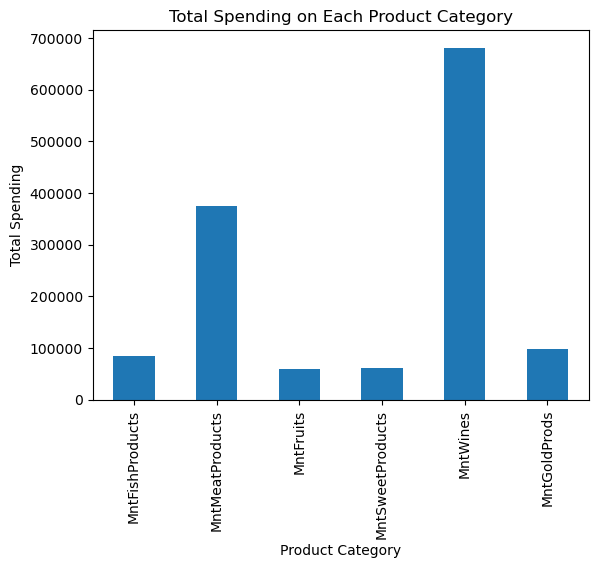

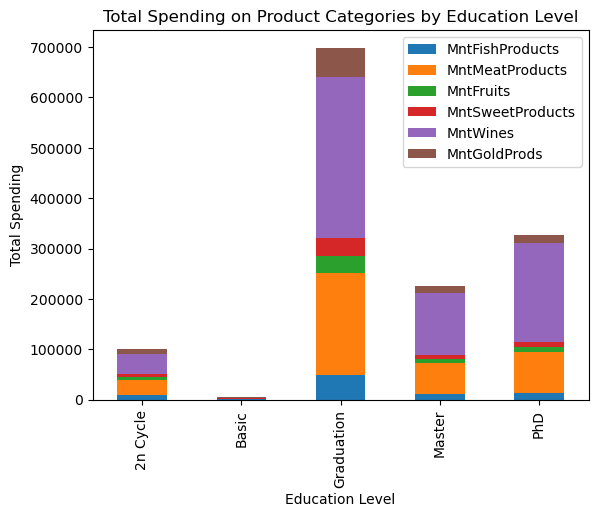

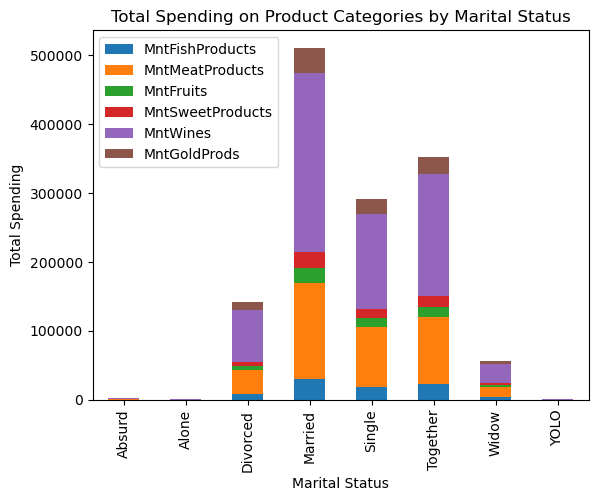

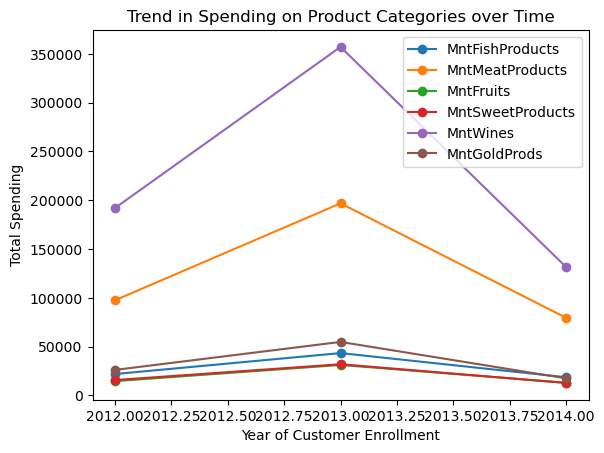

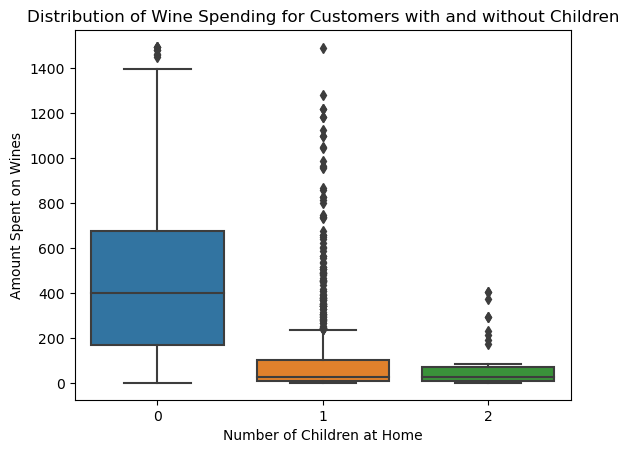

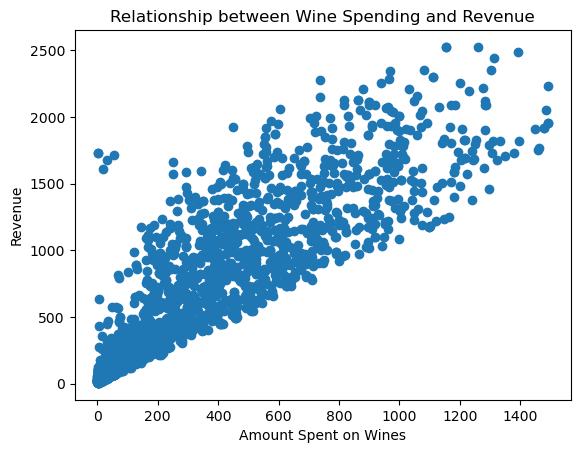

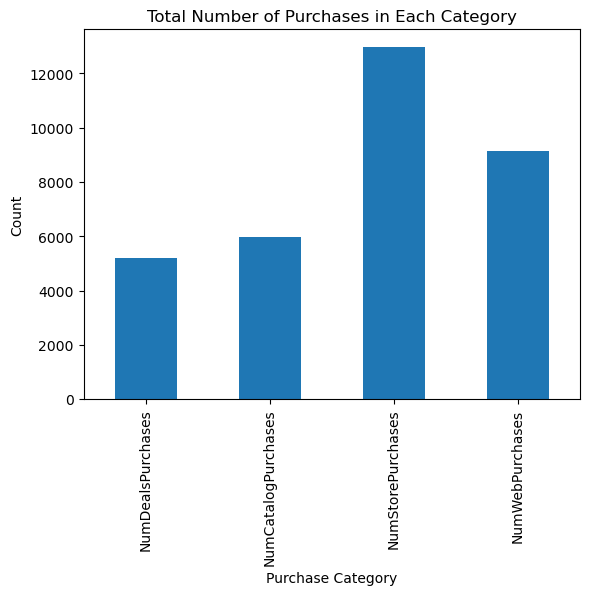

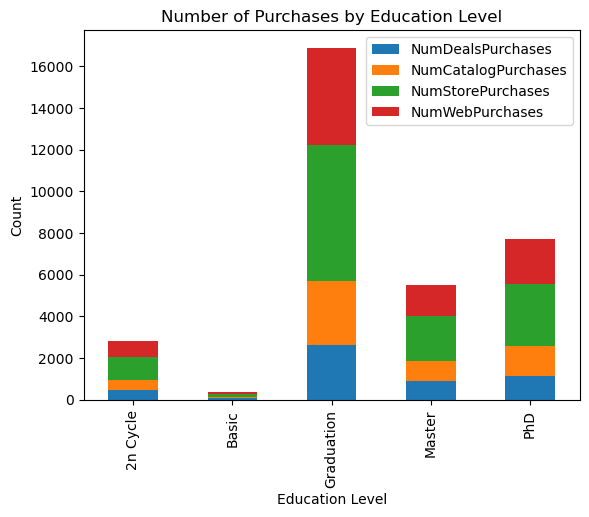

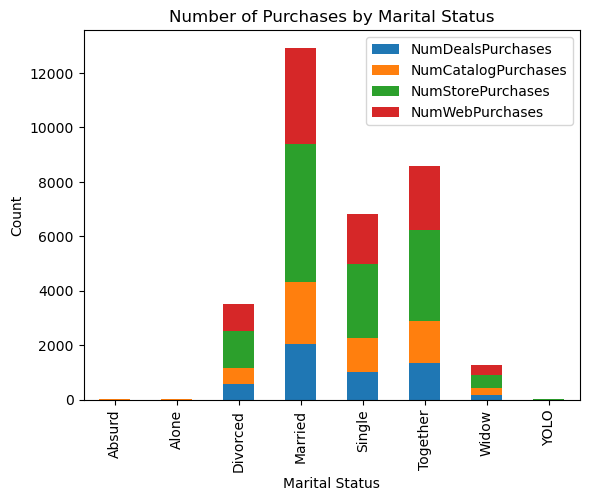

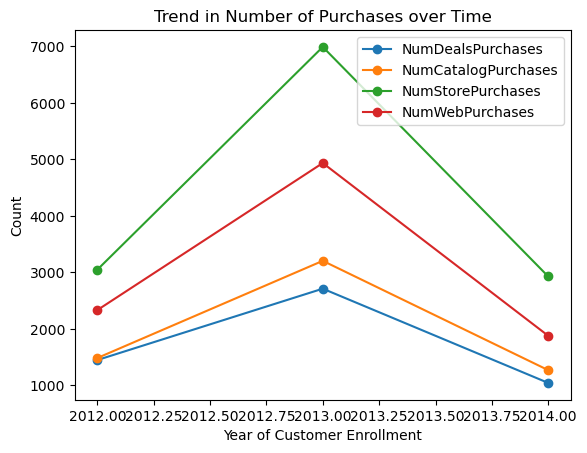

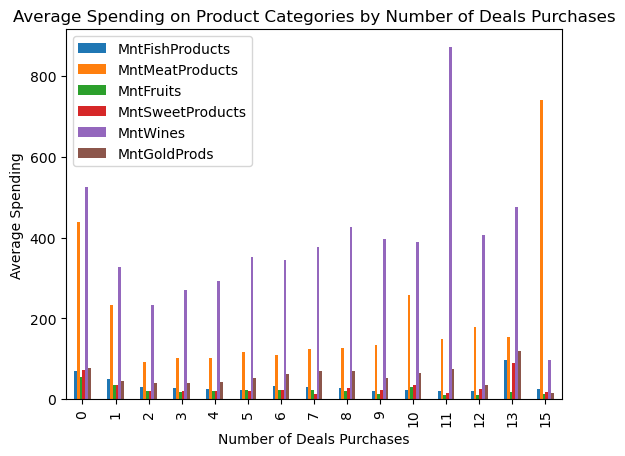

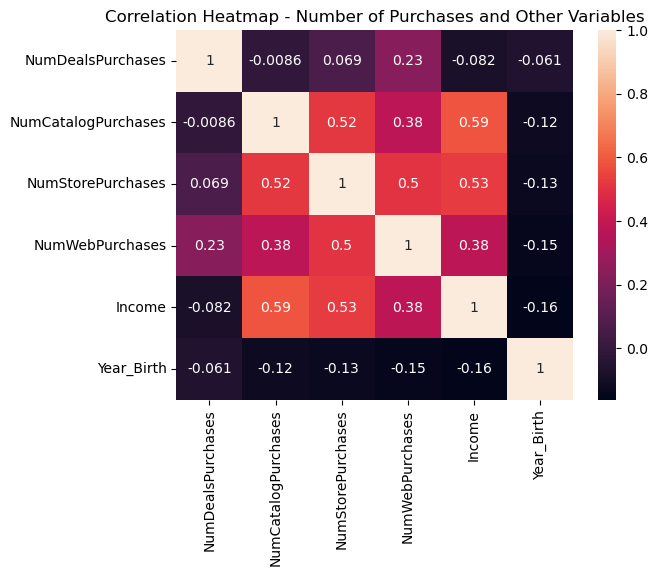

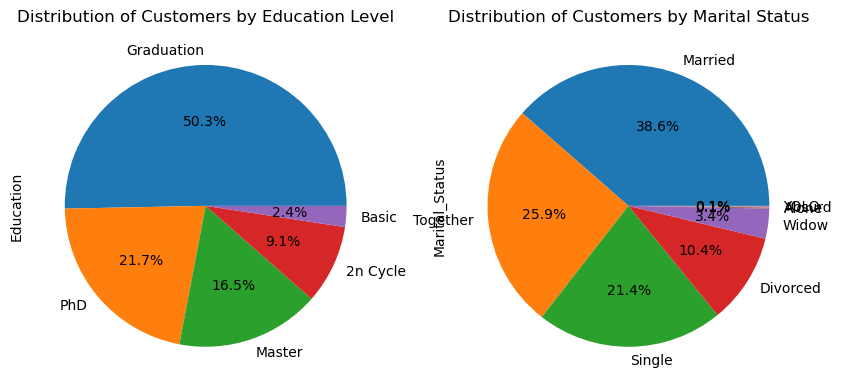

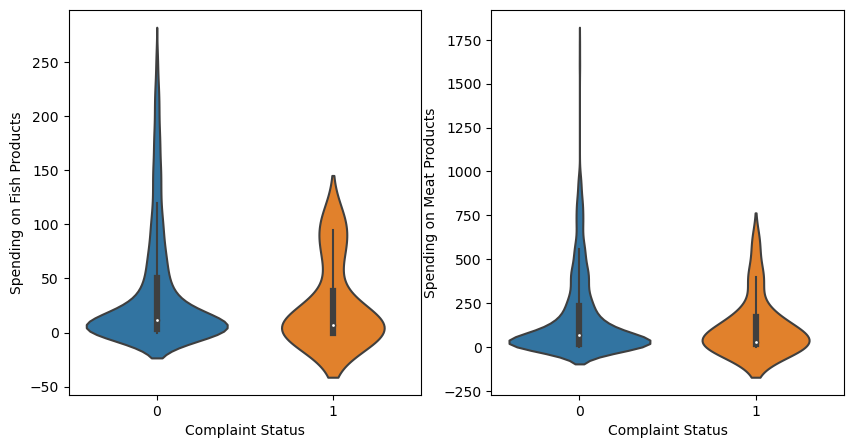

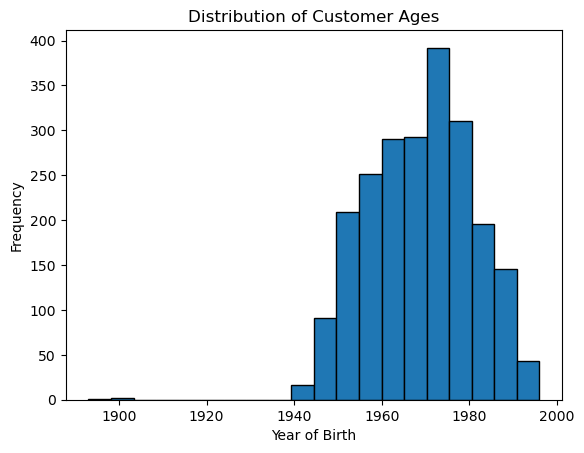

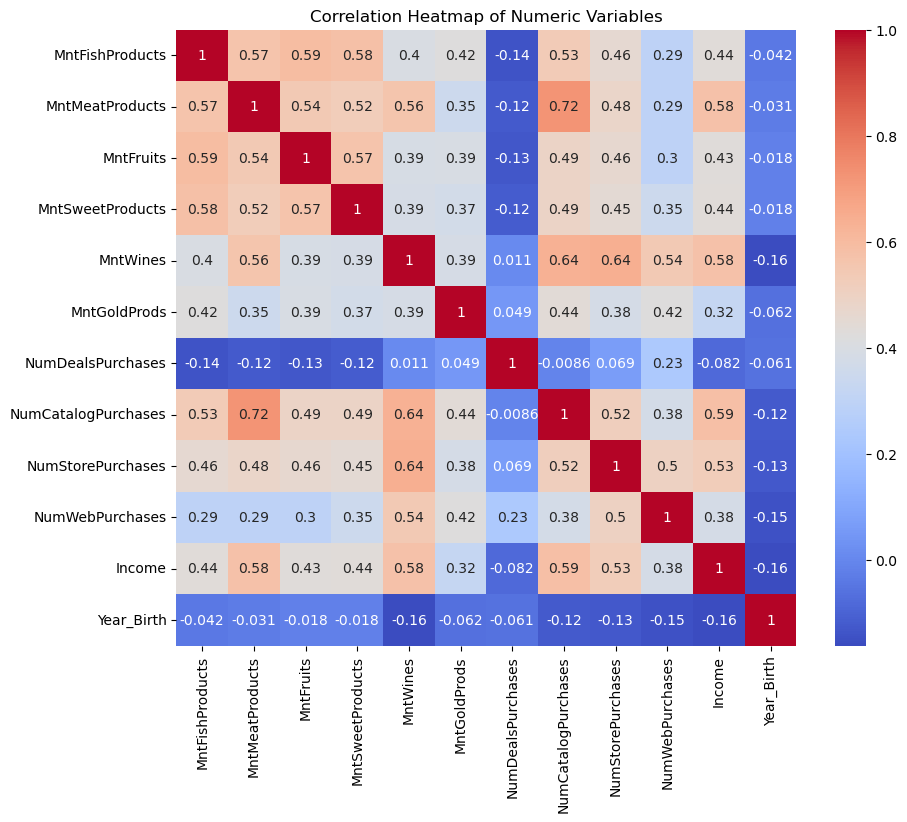

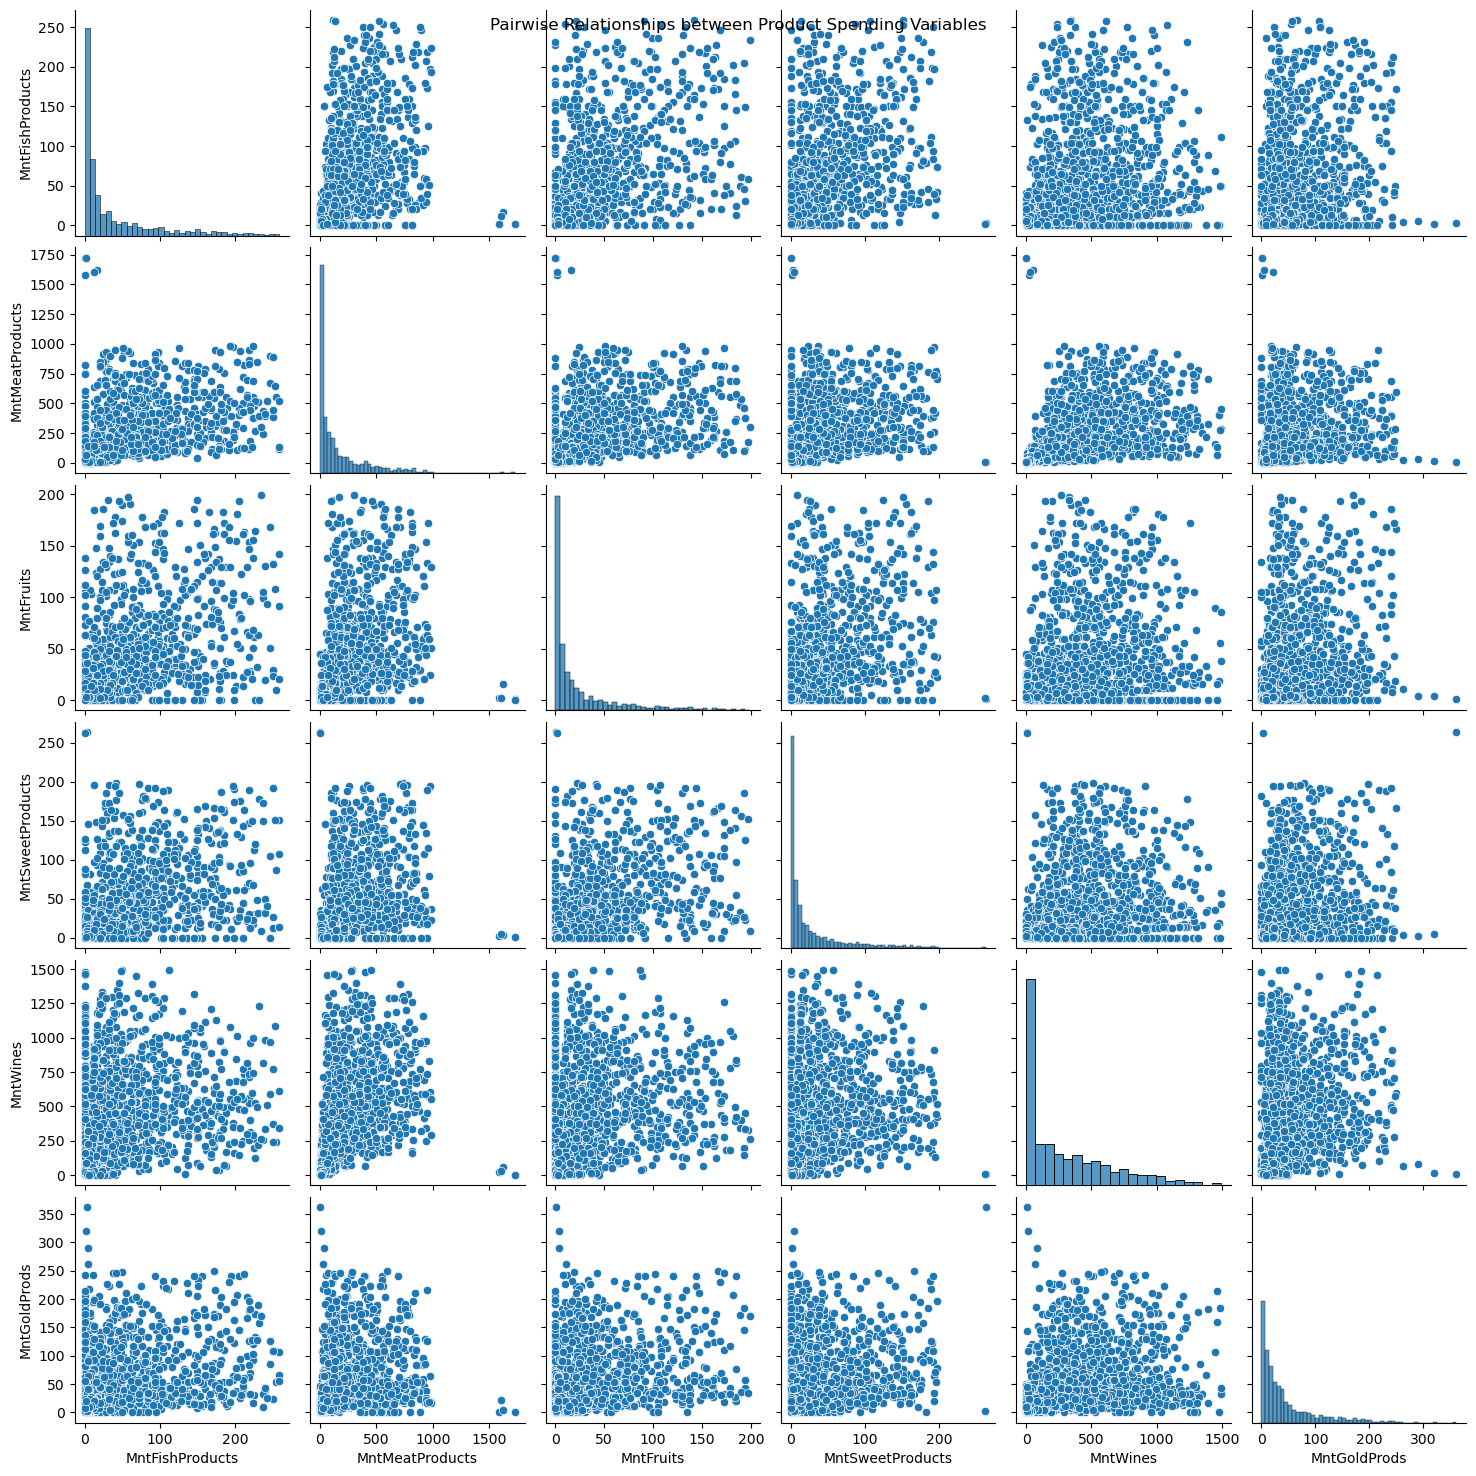

In [68]:
# Purchase Behavior (MntFishProducts, MntMeatProducts, MntFruits, MntSweetProducts, MntWines, MntGoldProds):

# Bar plot: Visualize the total spending on each product category.
product_categories = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
total_spending = marc[product_categories].sum()
total_spending.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.title('Total Spending on Each Product Category')
plt.show()

# Stacked bar plot: Compare the spending on different product categories across different education levels or marital statuses.
marc.groupby('Education')[product_categories].sum().plot(kind='bar', stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Total Spending')
plt.title('Total Spending on Product Categories by Education Level')
plt.show()

marc.groupby('Marital_Status')[product_categories].sum().plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.title('Total Spending on Product Categories by Marital Status')
plt.show()

# Line plot: Analyze the trend in spending on each product category over time.
marc.groupby('year_cust_enroll')[product_categories].sum().plot(marker='o')
plt.xlabel('Year of Customer Enrollment')
plt.ylabel('Total Spending')
plt.title('Trend in Spending on Product Categories over Time')
plt.show()

# Box plot: Compare the distribution of spending on different product categories for customers with and without children.
sns.boxplot(x='Kidhome', y='MntWines', data=marc)
plt.xlabel('Number of Children at Home')
plt.ylabel('Amount Spent on Wines')
plt.title('Distribution of Wine Spending for Customers with and without Children')
plt.show()

# Scatter plot: Explore the relationship between spending on one product category and the total revenue generated.
plt.scatter(marc['MntWines'], marc['Revenue'])
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Revenue')
plt.title('Relationship between Wine Spending and Revenue')
plt.show()

# Number of Purchases (NumDealsPurchases, NumCatalogPurchases, NumStorePurchases, NumWebPurchases):

# Bar plot: Visualize the count or average number of purchases in each category.
num_purchases = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
marc[num_purchases].sum().plot(kind='bar')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.title('Total Number of Purchases in Each Category')
plt.show()

# Stacked bar plot: Compare the number of purchases across different education levels or marital statuses.
marc.groupby('Education')[num_purchases].sum().plot(kind='bar', stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Number of Purchases by Education Level')
plt.show()

marc.groupby('Marital_Status')[num_purchases].sum().plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Number of Purchases by Marital Status')
plt.show()

# Line plot: Analyze the trend in the number of purchases over time.
marc.groupby('year_cust_enroll')[num_purchases].sum().plot(marker='o')
plt.xlabel('Year of Customer Enrollment')
plt.ylabel('Count')
plt.title('Trend in Number of Purchases over Time')
plt.show()

# Grouped bar plot: Compare the average spending on different product categories for customers based on the number of purchases.
purchase_groups = marc.groupby('NumDealsPurchases')[product_categories].mean()
purchase_groups.plot(kind='bar')
plt.xlabel('Number of Deals Purchases')
plt.ylabel('Average Spending')
plt.title('Average Spending on Product Categories by Number of Deals Purchases')
plt.show()

# Heatmap: Explore the correlation between the number of purchases and other variables like income or age.
purchase_corr = marc[['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'Income', 'Year_Birth']].corr()
sns.heatmap(purchase_corr, annot=True)
plt.title('Correlation Heatmap - Number of Purchases and Other Variables')
plt.show()

# Pie Chart: Visualize the distribution of customers across different education levels or marital statuses.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
marc['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Customers by Education Level')

plt.subplot(1, 2, 2)
marc['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Customers by Marital Status')
plt.show()

# Violin Plot: Compare the distribution of spending on different product categories for customers with and without complaints.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x='Complain', y='MntFishProducts', data=marc)
plt.xlabel('Complaint Status')
plt.ylabel('Spending on Fish Products')

plt.subplot(1, 2, 2)
sns.violinplot(x='Complain', y='MntMeatProducts', data=marc)
plt.xlabel('Complaint Status')
plt.ylabel('Spending on Meat Products')
plt.show()

# Histogram: Analyze the distribution of customer ages.
plt.hist(marc['Year_Birth'], bins=20, edgecolor='black')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Ages')
plt.show()

# Heatmap: Explore the correlation between different numeric variables in the dataset.
numeric_variables = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines',
                     'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases',
                     'Income', 'Year_Birth']
correlation = marc[numeric_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# Pair Plot: Visualize pairwise relationships between multiple variables.
pairwise_variables = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
sns.pairplot(marc[pairwise_variables])
plt.suptitle('Pairwise Relationships between Product Spending Variables')
plt.show()

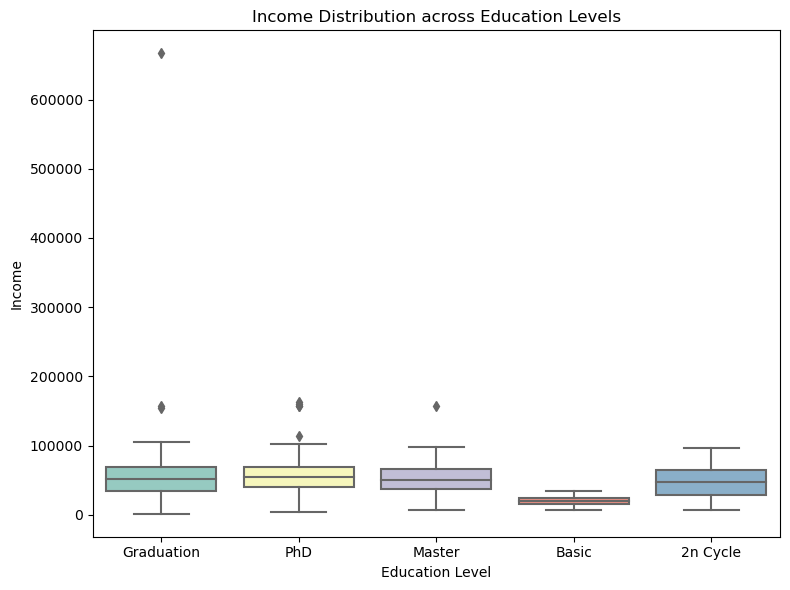

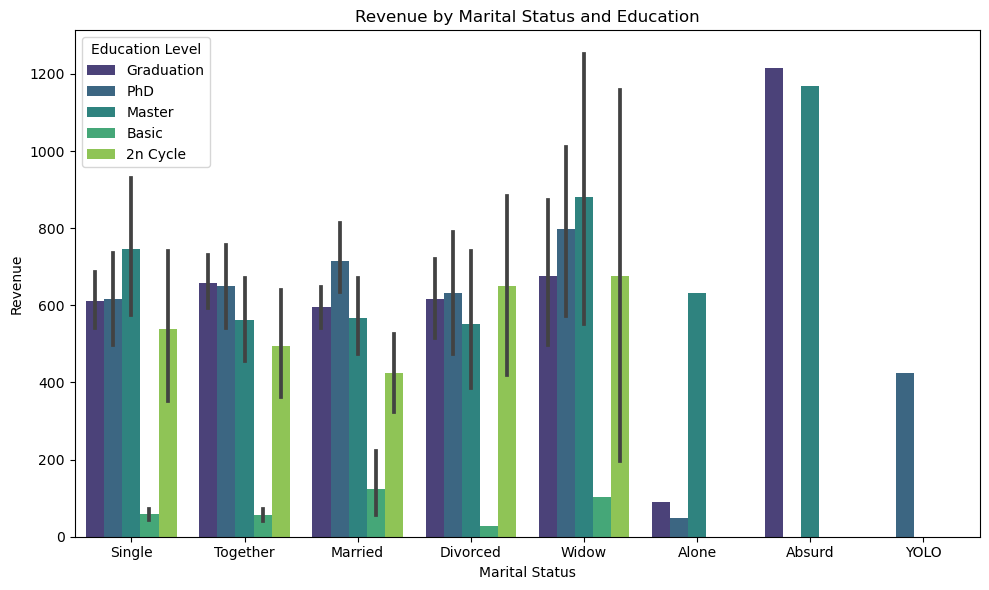

<Figure size 1000x600 with 0 Axes>

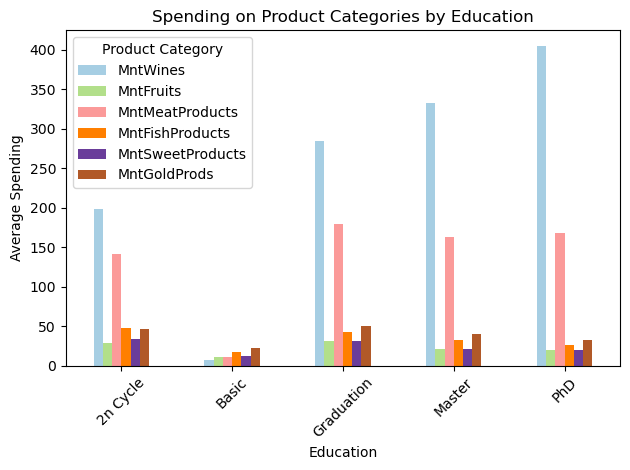

In [69]:
# Income vs Education
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='Income', data=marc, palette='Set3')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.title('Income Distribution across Education Levels')
plt.tight_layout()
plt.show()

# Revenue vs Kidhome, Teenhome, Marital Status, and Education
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='Revenue', hue='Education', data=marc, palette='viridis')
plt.xlabel('Marital Status')
plt.ylabel('Revenue')
plt.title('Revenue by Marital Status and Education')
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()

# Marital Status, Education vs Product Categories Spending
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(10, 6))
marc.groupby('Education')[categories].mean().plot(kind='bar', colormap='Paired')

plt.xlabel('Education')
plt.ylabel('Average Spending')
plt.title('Spending on Product Categories by Education')
plt.legend(title='Product Category')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
# Data Analysis, Exploration, and Reporting
# Top 10 IDs by revenue
top_10_ids_revenue = marc.nlargest(10, 'Revenue')['ID']
print("Top 10 IDs by revenue:")
print(top_10_ids_revenue)

# Top 10 responses by ID
top_10_ids_responses = marc.groupby('ID')['Response'].sum().nlargest(10)
print("Top 10 responses by ID:")
print(top_10_ids_responses)

# Top 10 complaints by ID and revenue
top_10_ids_complaints_revenue = marc.groupby('ID')['Complain'].sum().nlargest(10)
print("Top 10 complaints by ID and revenue:")
print(top_10_ids_complaints_revenue)

# Most popular education level
popular_education = marc['Education'].value_counts().idxmax()
print("Most popular education level:", popular_education)

# Most popular marital status
popular_marital_status = marc['Marital_Status'].value_counts().idxmax()
print("Most popular marital status:", popular_marital_status)

# Most common Dt_Customer
popular_dt_customer = marc['year_cust_enroll'].value_counts().idxmax()
print("Most common Dt_Customer:", popular_dt_customer)

Top 10 IDs by revenue:
1179     5735
1572     5350
1492     1763
987      4580
1052     4475
1601     5453
1458    10133
1288     9010
943      5386
1301     6024
Name: ID, dtype: int64
Top 10 responses by ID:
ID
1      1
35     1
158    1
195    1
234    1
247    1
263    1
339    1
340    1
380    1
Name: Response, dtype: int64
Top 10 complaints by ID and revenue:
ID
255     1
359     1
2875    1
3120    1
3710    1
4427    1
5726    1
6142    1
6201    1
6730    1
Name: Complain, dtype: int64
Most popular education level: Graduation
Most popular marital status: Married
Most common Dt_Customer: 2013


In [71]:
# Data Analysis, Exploration, and Reporting
# Top 10 IDs by revenue
top_10_ids_revenue = marc.nlargest(10, 'Revenue')['ID']

# Top 10 responses by ID
top_10_ids_responses = marc.groupby('ID')['Response'].sum().nlargest(10)

# Top 10 complaints by ID and revenue
top_10_ids_complaints_revenue = marc.groupby('ID')['Complain'].sum().nlargest(10)

# Most popular education level
popular_education = marc['Education'].value_counts().idxmax()
popular_marital_status = marc['Marital_Status'].value_counts().idxmax()
popular_dt_customer = marc['year_cust_enroll'].value_counts().idxmax()

# Documenting the findings
report = """
Data Analysis, Exploration, and Reporting:

- Top 10 IDs by revenue:
{}
- Most popular education level: {}
- Most popular marital status: {}
- Most common Dt_Customer: {}
""".format(
    top_10_ids_revenue.to_string(index=False),
    popular_education,
    popular_marital_status,
    popular_dt_customer
)

print(report)


Data Analysis, Exploration, and Reporting:

- Top 10 IDs by revenue:
 5735
 5350
 1763
 4580
 4475
 5453
10133
 9010
 5386
 6024
- Most popular education level: Graduation
- Most popular marital status: Married
- Most common Dt_Customer: 2013

